## TensorFlow Exercise in Python

### By Thomas Oswald

#### Srping 2020, Data 4319

TensorFlow is a free and open-source library for dataflow and differentiable programming across a range of tasks. In this notebook, a machine learning exercise is being performed on the MNIST fashion data set.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

X_valid = X_train_full[:5000]/255.0
X_train = X_train_full[5000:]/255.0

Y_valid = Y_train_full[:5000]
Y_train = Y_train_full[5000:]


### Image of the first item without a normalized scale

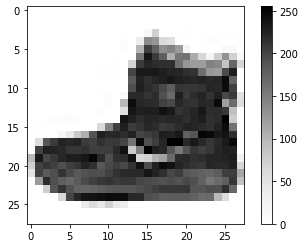

In [20]:
plt.imshow(X_train_full[0], cmap = "Greys")
plt.colorbar()

### Image of the first item with a normalized scale

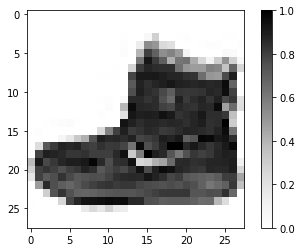

In [23]:
plt.imshow(X_valid[0], cmap = "Greys")
plt.colorbar()

In [26]:
class_name = ['T-Shirt/top',
             'Trouser',
             'Pullover',
             'Dress',
             'Coat',
             'Sandal',
             'Shirt',
             'Sneaker',
             'Bag',
             'Ankle Boot']

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

In [27]:
model.fit(X_train, Y_train, epochs=10, batch_size = 32, validation_data = (X_valid, Y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 106us/sample - loss: 0.7066 - acc: 0.7686 - val_loss: 0.4971 - val_acc: 0.8300
Epoch 2/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.4839 - acc: 0.8331 - val_loss: 0.4778 - val_acc: 0.8388
Epoch 3/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4399 - acc: 0.8470 - val_loss: 0.4241 - val_acc: 0.8520
Epoch 4/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4131 - acc: 0.8553 - val_loss: 0.4219 - val_acc: 0.8492
Epoch 5/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3928 - acc: 0.8623 - val_loss: 0.3780 - val_acc: 0.8702
Epoch 6/10
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3763 - acc: 0.8679 - val_loss: 0.4016 - val_acc: 0.8588
Epoch 7/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3627 - acc: 0.8725 - val_lo

### DataFrame of the model History

In [29]:
df = pd.DataFrame(model.history.history)
df

,loss,acc,val_loss,val_acc
0,0.706632,0.768582,0.497079,0.8300
1,0.483909,0.833145,0.477833,0.8388
2,0.439854,0.847036,0.424136,0.8520
3,0.413091,0.855291,0.421900,0.8492
4,0.392770,0.862309,0.378010,0.8702
5,0.376273,0.867945,0.401603,0.8588
6,0.362663,0.872491,0.356101,0.8752
7,0.350509,0.875309,0.370951,0.8704
8,0.340688,0.879909,0.346011,0.8768
9,0.331254,0.882945,0.335396,0.8850


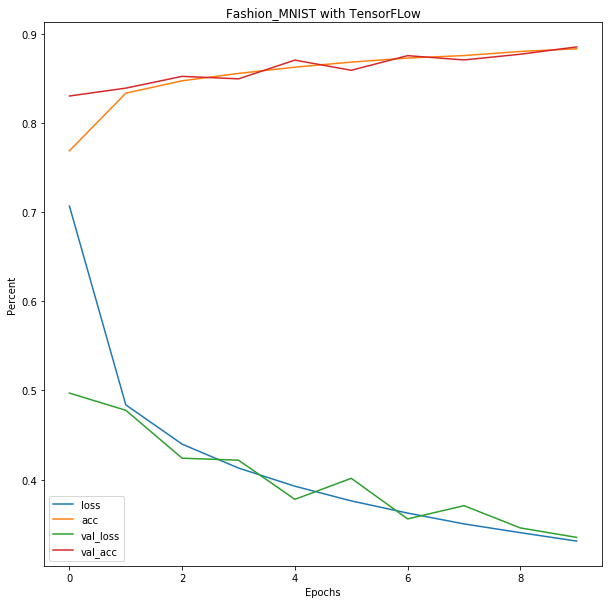

In [34]:
df.plot(figsize=(10,10))

plt.title("Fashion_MNIST with TensorFLow")
plt.xlabel('Epochs')
plt.ylabel('Percent')
plt.legend()